In [27]:
import pytesseract
import numpy as np
import cv2 
import matplotlib.pyplot as plt

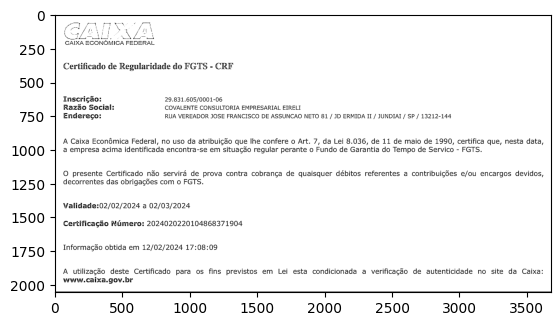

In [28]:
img = cv2.imread('../images/FGTS/323990.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [29]:
texto = pytesseract.image_to_string(img)

In [30]:
print(texto)

op FAT

i a é fr i ! 1 kop \
WFAA aA LAK
CAIXA ECONOMICA FEDERAL

Certificado de Regularidade do FGTS - CRF
29.831.605/0001-06
COVALENTE CONSULTORIA EMPRESARIAL EIRELI
RUA VEREADOR JOSE FRANCISCO DE ASSUNCAO NETO 81 / JD ERMIDA II / JUNDIAI / SP / 13212-144

Razao Social:

a empresa acima identificada encontra-se em situacao regular perante o Fundo de Garantia do Tempo de Servico - FGTS.

Inscricao:
Endereco:
A Caixa Econémica Federal, no uso da atribuicdo que Ihe confere o Art. 7, da Lei 8.036, de 11 de maio de 1990, certifica que, nesta data,

O presente Certificado nado servira de prova contra cobranca de quaisquer débitos referentes a contribuicdes e/ou encargos devidos,

decorrentes das obrigagSes com o FGTS.

 

Validade:02/02/2024 a 02/03/2024
Certificagdo Numero: 2024020220104868371904

Informacdo obtida em 12/02/2024 17:08:09
A utilizagao deste Certificado para os fins previstos em Lei esta condicionada a verificacdo de autenticidade no site da Caixa:

www.caixa.gov.br



In [31]:
!tesseract --list-langs

List of available languages (3):
eng
osd
por


In [32]:
texto = pytesseract.image_to_string(img, lang='por')
print(texto)

O TA AN

( A Í H! | | ca fa 1
NOLL CANOA
CAIXA ECONOMICA FEDERAL

Certificado de Regularidade do FGTS - CRF
29.831.605/0001-06
COVALENTE CONSULTORIA EMPRESARIAL ETRELI
RUA VEREADOR JOSE FRANCISCO DE ASSUNCAO NETO 81 / JD ERMIDA II / JUNDIAI / SP / 13212-144

Razão Social:

a empresa acima identificada encontra-se em situação regular perante o Fundo de Garantia do Tempo de Servico - FGTS.

Inscrição:
Endereço:
A Caixa Econômica Federal, no uso da atribuição que lhe confere o Art. 7, da Lei 8.036, de 11 de maio de 1990, certifica que, nesta data,

O presente Certificado não servirá de prova contra cobrança de quaisquer débitos referentes a contribuições e/ou encargos devidos,

decorrentes das obrigações com o FGTS.

 

Validade:02/02/2024 a 02/03/2024
Certificação Número: 2024020220104868371904

Informação obtida em 12/02/2024 17:08:09
A utilização deste Certificado para os fins previstos em Lei esta condicionada a verificação de autenticidade no site da Caixa:

www.caixa.gov.br



In [41]:
texto = texto + "irregular"

In [33]:
import re

padrao_data = r'(\d{2}/\d{2}/\d{4})'
data = re.findall(padrao_data, texto)
print(data)

['02/02/2024', '02/03/2024', '12/02/2024']


In [62]:
padrao_cnpj = r'(\d{2}\.\d{3}\.\d{3}/\d{4}-\d{2})'
padrao_cnpj_sem_pontos = r'(\d{8}/\d{4}-\d{2})'
padrao_cert_num = r'(\d{22})'
padrao_situacao = r' (regular) '
padrao_data = r'(\d{2}/\d{2}/\d{4})'

cnpj_encontrado = re.search(padrao_cnpj, texto)
if cnpj_encontrado:
    cnpj = cnpj_encontrado.group(0)
    print("CNPJ:", cnpj)

cnpj_tipo_dois = re.search(padrao_cnpj_sem_pontos, texto)
if cnpj_tipo_dois:
    cnpj_tipo_dois = cnpj_tipo_dois.group(0)
    print("CNPJ:", cnpj_tipo_dois)

cert_num_encontrado = re.search(padrao_cert_num, texto)
if cert_num_encontrado:
    cert_num = cert_num_encontrado.group(0)
    print("Certificação número:", cert_num)

situacao_encontrada = re.search(padrao_situacao, texto, re.IGNORECASE)
if situacao_encontrada:
    situacao = situacao_encontrada.group(0)
    print("Situação:", situacao)

data = re.findall(padrao_data, texto)
print(data)

CNPJ: 29.831.605/0001-06
Certificação número: 2024020220104868371904
Situação:  regular 
['02/02/2024', '02/03/2024', '12/02/2024']
